In [288]:
import os
import certifi
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

os.environ['SSL_CERT_FILE'] = certifi.where()

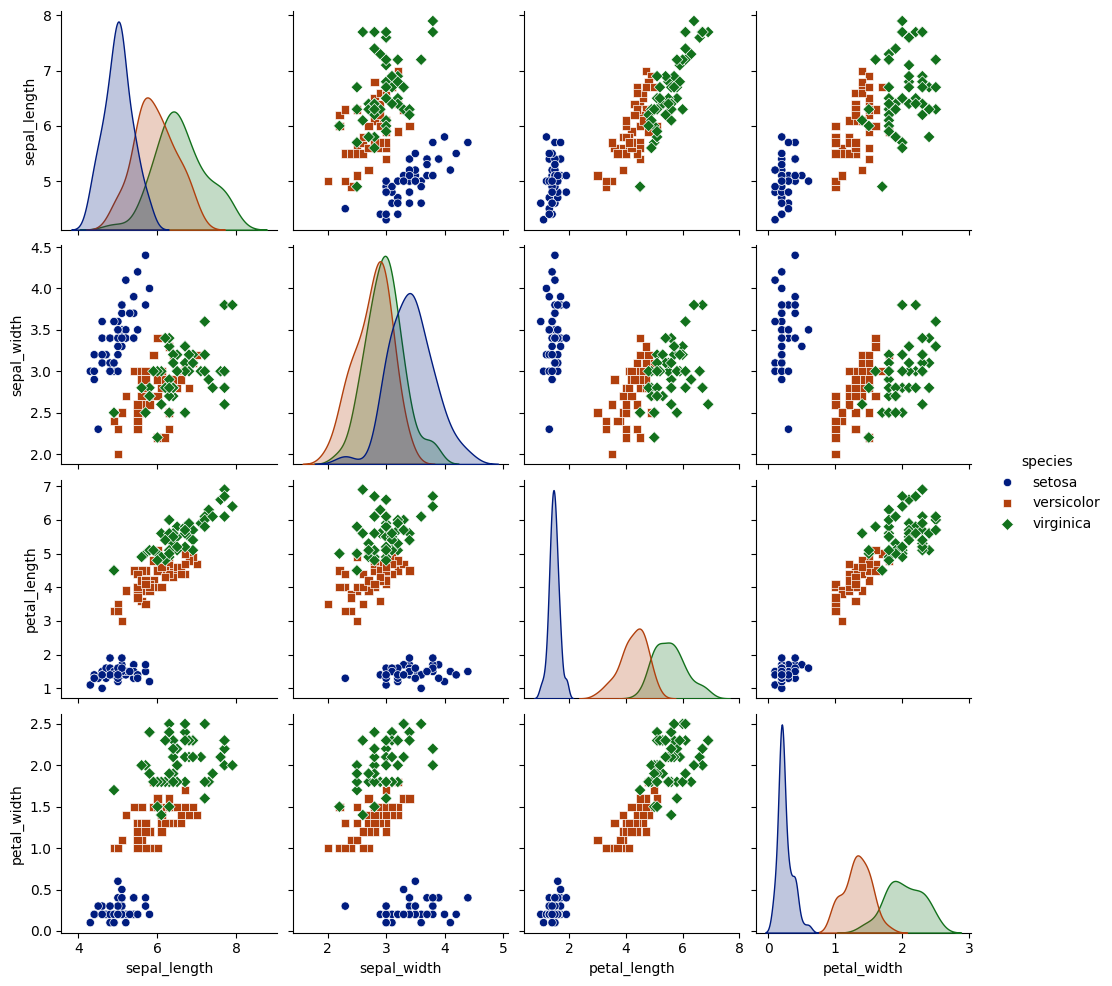

In [289]:
# Load the dataset
df = sns.load_dataset('iris')

# Pairplot with KDE diagonal
sns.pairplot(df, hue='species', diag_kind='kde', markers=["o", "s", "D"], palette='dark')

plt.show()

In [290]:
# Select independent variables
X = df[['sepal_length', 'sepal_width', 'petal_width']]
X = sm.add_constant(X)  # Add a constant term to the predictor

# Select dependent variable
y = df['petal_length']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          6.98e-109
Time:                        01:09:50   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2627      0.297     -0.883   

In [291]:
# Create a linear regression model
lin_reg = LinearRegression()

# Create an RFE model and select 2 features
rfe = RFE(lin_reg)
fit = rfe.fit(X, y)

# Print the selected features
print("Num Features: %s" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 2
Selected Features: [False  True False  True]
Feature Ranking: [3 1 2 1]


In [292]:
X = df.drop(columns='species')

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_std = (X - X.mean()) / X.std()  ## another variant of standardizing

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with species
final_df = pd.concat([principal_df, df[['species']]], axis=1)

# Summary of PCA
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


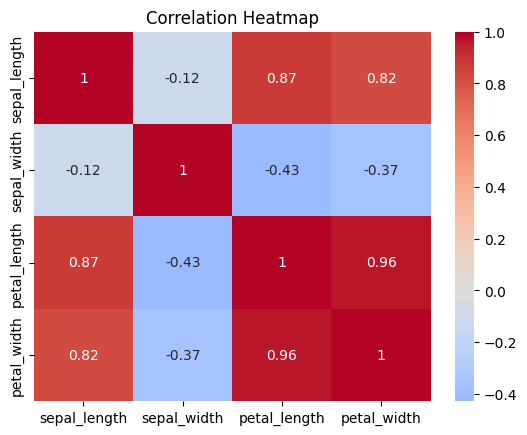

In [293]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

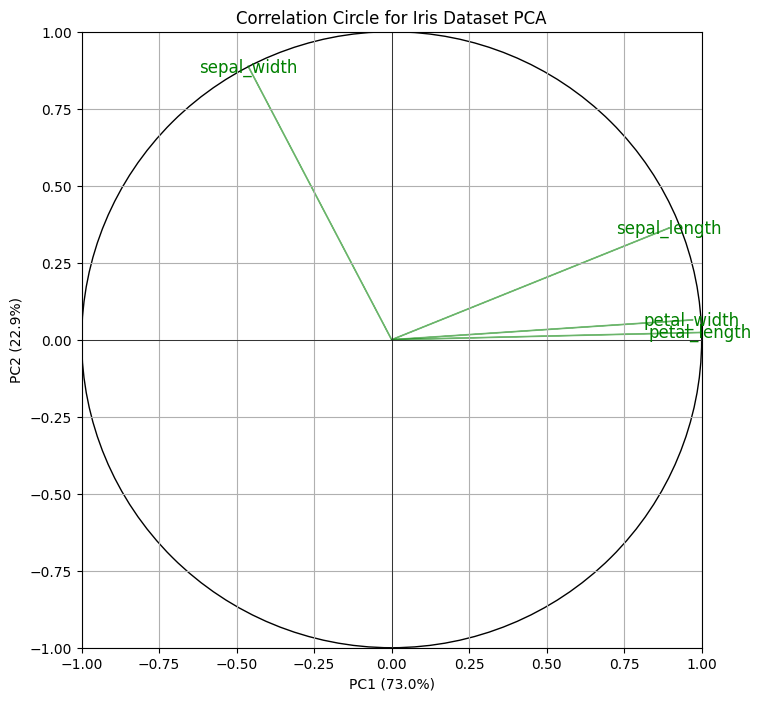

In [294]:
# Plotting the correlation circle
fig, ax = plt.subplots(figsize=(8, 8))

# Plot circle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Plot vectors
vectors = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, (v, var_name) in enumerate(zip(vectors, X.columns)):
    plt.arrow(0, 0, v[0], v[1], color='g', alpha=0.5)
    plt.text(v[0], v[1], var_name, color='g', ha='center', va='center', fontsize=12)

# Set limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Label axes
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')

# Grid and title
plt.grid()
plt.title('Correlation Circle for Iris Dataset PCA')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.show()

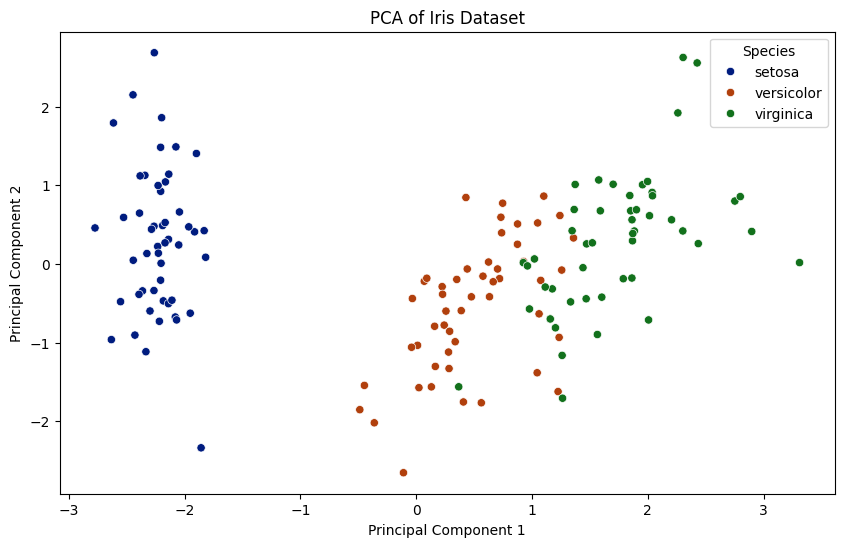

In [295]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=final_df, palette='dark')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

In [296]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [297]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

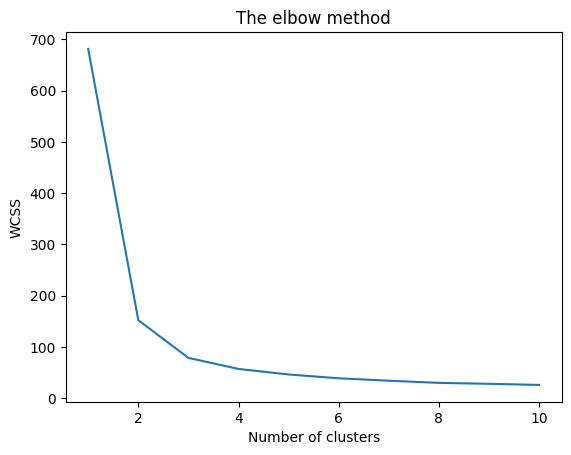

In [298]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [299]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

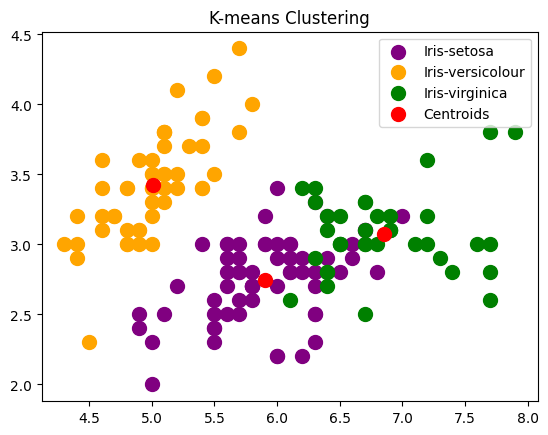

In [300]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()